In [45]:
import pandas as pd

In [48]:
df = pd.read_csv(r"C:\Users\mailr\Downloads\weekly_market_2017_2022.tsv",sep='\t')
df.head(5)

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,average_adjustment_average_homes_sold,adjusted_average_homes_sold,average_adjustment_average_new_listings,adjusted_average_new_listings,average_adjustment_pending_sales,adjusted_pending_sales,adjusted_average_homes_delisted_yoy,adjusted_average_homes_sold_yoy,adjusted_average_new_listings_yoy,adjusted_pending_sales_yoy
0,441,5,"Brevard County, FL",county,2021-04-12,2021-04-18,1 weeks,334.0,0.629268,334.0,...,NaN,334.0,NaN,283.0,NaN,284.0,-0.512195,0.629268,0.132000,1.103704
1,441,5,"Brevard County, FL",county,2019-03-18,2019-03-24,1 weeks,248.0,-0.057034,248.0,...,NaN,248.0,NaN,291.0,NaN,147.0,0.000000,-0.057034,-0.115502,-0.051613
2,682,5,"Caribou County, ID",county,2017-03-13,2017-03-19,1 weeks,1.0,NaN,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,155,5,"Jefferson County, AL",county,2018-03-26,2018-04-01,1 weeks,283.0,0.092664,283.0,...,NaN,283.0,NaN,216.0,NaN,182.0,-0.352941,0.092664,-0.175573,0.300000
4,441,5,"Brevard County, FL",county,2019-07-29,2019-08-04,1 weeks,364.0,0.120000,364.0,...,NaN,364.0,NaN,296.0,NaN,219.0,0.106383,0.120000,-0.175487,0.123077


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945431 entries, 0 to 1945430
Data columns (total 98 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   region_id                                     int64  
 1   region_type_id                                int64  
 2   region_name                                   object 
 3   region_type                                   object 
 4   period_begin                                  object 
 5   period_end                                    object 
 6   duration                                      object 
 7   total_homes_sold                              float64
 8   total_homes_sold_yoy                          float64
 9   average_homes_sold                            float64
 10  average_homes_sold_yoy                        float64
 11  total_homes_sold_with_price_drops             float64
 12  total_homes_sold_with_price_drops_yoy         float64
 1

In [50]:
df['period_begin'] = df['period_begin'].apply(pd.to_datetime)

In [51]:
df['period_end'] = df['period_end'].apply(pd.to_datetime)

In [73]:
def handle_null_values(df):
    drop_cols=[]
    no_null = True
    for col in df.columns:
        null_cnt = df[col].isnull().sum()
        if 0<float(null_cnt)/ float(df.shape[0]) <0.1:
            medi = df[col].median()
            df[col]= df[col].apply(lambda x : medi if x==None else x)
            print(f"Replaced {null_cnt} values in {col} with median {medi}")
            no_null = False
        elif  null_cnt==0:
            no_null = no_null and True
        else:
            drop_cols.append(col)
    if no_null:
        print("No null values found")
    else:
        if len(drop_cols)>0:
            print("Dropped {len(drop_cols)} columns : {drop_cols}")
        else:
            print("No columns dropped")
    return (df.drop(columns=drop_cols,inplace=True),drop_cols)

In [53]:
handle_null_values(df)

Replaced 191274 values in total_new_listings with median 43.0
Replaced 191274 values in average_new_listings with median 11.0
Replaced 192001 values in median_new_listing_price with median 210000.0
Replaced 15632 values in inventory with median 123.0
Replaced 61000 values in inventory_yoy with median -0.0959752321981424
Replaced 13664 values in total_active_listings with median 462.0
Replaced 58380 values in total_active_listings_yoy with median -0.09033049961358365
Replaced 13664 values in active_listings with median 133.0
Replaced 58380 values in active_listings_yoy with median -0.08812260536398464
Replaced 15632 values in age_of_inventory with median 67.4
Replaced 61000 values in age_of_inventory_yoy with median -6.9
Replaced 14644 values in median_active_list_price with median 214530.4
Replaced 59543 values in median_active_list_price_yoy with median 0.07114513675517431
Replaced 16533 values in median_active_list_ppsf with median 113.6936790038983
Replaced 62905 values in median_ac

(         region_id  region_type_id             region_name region_type  \
 0              441               5      Brevard County, FL      county   
 1              441               5      Brevard County, FL      county   
 2              682               5      Caribou County, ID      county   
 3              155               5    Jefferson County, AL      county   
 4              441               5      Brevard County, FL      county   
 ...            ...             ...                     ...         ...   
 1945426      33220              -2  Midland, MI metro area       metro   
 1945427       2776               5      Kleberg County, TX      county   
 1945428       2965               5      Fairfax County, VA      county   
 1945429       2776               5      Kleberg County, TX      county   
 1945430      33700              -2  Modesto, CA metro area       metro   
 
         period_begin period_end  duration  total_new_listings  \
 0         2021-04-12 2021-04-18

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945431 entries, 0 to 1945430
Data columns (total 98 columns):
 #   Column                                        Dtype         
---  ------                                        -----         
 0   region_id                                     int64         
 1   region_type_id                                int64         
 2   region_name                                   object        
 3   region_type                                   object        
 4   period_begin                                  datetime64[ns]
 5   period_end                                    datetime64[ns]
 6   duration                                      object        
 7   total_homes_sold                              float64       
 8   total_homes_sold_yoy                          float64       
 9   average_homes_sold                            float64       
 10  average_homes_sold_yoy                        float64       
 11  total_homes_sold_with_pr

In [38]:
df.region_type_id.value_counts()

 5    1463449
-2     481982
Name: region_type_id, dtype: int64

In [39]:
df.region_type.value_counts()

county    1463449
metro      481982
Name: region_type, dtype: int64

In [ ]:
#From what I could observe, with the dataset containing only the duration set to be '1 week', we can obatin the 
#rest of the dataset.
#so to reduce the workload lets consider only '1 week' durations 

In [55]:
df_1week = df[df["duration"] == '1 weeks']

In [74]:
handle_null_values(df_1week)

<ipython-input-73-f3e3aa65f553>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]= df[col].apply(lambda x : medi if x==None else x)


Replaced 5050 values in inventory with median 124.0
Replaced 21797 values in inventory_yoy with median -0.09819639278557114
Replaced 4260 values in total_active_listings with median 134.0
Replaced 20757 values in total_active_listings_yoy with median -0.0901277834795049
Replaced 4260 values in active_listings with median 134.0
Replaced 20757 values in active_listings_yoy with median -0.0901277834795049
Replaced 5050 values in age_of_inventory with median 67.0
Replaced 21797 values in age_of_inventory_yoy with median -7.0
Replaced 4590 values in median_active_list_price with median 214950.0
Replaced 21165 values in median_active_list_price_yoy with median 0.07145409074669518
Replaced 5325 values in median_active_list_ppsf with median 113.8882202305319
Replaced 22406 values in median_active_list_ppsf_yoy with median 0.0726111148123001
Dropped {len(drop_cols)} columns : {drop_cols}


C:\Users\mailr\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(None,
 ['total_homes_sold',
  'total_homes_sold_yoy',
  'average_homes_sold',
  'average_homes_sold_yoy',
  'total_homes_sold_with_price_drops',
  'total_homes_sold_with_price_drops_yoy',
  'average_homes_sold_with_price_drops',
  'average_homes_sold_with_price_drops_yoy',
  'percent_homes_sold_with_price_drops',
  'percent_homes_sold_with_price_drops_yoy',
  'median_sale_price',
  'median_sale_price_yoy',
  'median_sale_ppsf',
  'median_sale_ppsf_yoy',
  'median_days_to_close',
  'median_days_to_close_yoy',
  'price_drops',
  'price_drops_yoy',
  'percent_active_listings_with_price_drops',
  'percent_active_listings_with_price_drops_yoy',
  'pending_sales',
  'pending_sales_yoy',
  'median_pending_sqft',
  'median_pending_sqft_yoy',
  'off_market_in_two_weeks',
  'off_market_in_two_weeks_yoy',
  'off_market_in_one_week',
  'off_market_in_one_week_yoy',
  'percent_off_market_in_two_weeks',
  'percent_off_market_in_two_weeks_yoy',
  'percent_off_market_in_one_week',
  'percent_off_mark

In [75]:
df_1week

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,inventory,inventory_yoy,total_active_listings,total_active_listings_yoy,active_listings,active_listings_yoy,age_of_inventory,age_of_inventory_yoy,median_active_list_price,median_active_list_price_yoy,median_active_list_ppsf,median_active_list_ppsf_yoy,last_updated
0,441,5,"Brevard County, FL",county,2021-04-12,2021-04-18,1 weeks,2907.0,-0.313739,3272.0,-0.269643,3272.0,-0.269643,41.0,-17.0,299900.0,0.090545,174.937500,0.138018,2022-03-23 17:53:25
1,441,5,"Brevard County, FL",county,2019-03-18,2019-03-24,1 weeks,4986.0,0.108986,5266.0,0.099603,5266.0,0.099603,64.0,10.0,259000.0,0.016683,146.544151,0.022145,2022-03-23 17:53:25
2,682,5,"Caribou County, ID",county,2017-03-13,2017-03-19,1 weeks,6.0,0.200000,7.0,0.400000,7.0,0.400000,89.0,38.0,98000.0,-0.367742,48.826597,-0.194834,2022-03-23 17:53:25
3,155,5,"Jefferson County, AL",county,2018-03-26,2018-04-01,1 weeks,3145.0,-0.149310,3446.0,-0.128918,3446.0,-0.128918,56.0,-4.0,199650.0,0.024371,100.677201,0.030044,2022-03-23 17:53:25
4,441,5,"Brevard County, FL",county,2019-07-29,2019-08-04,1 weeks,4297.0,-0.052272,4700.0,-0.037477,4700.0,-0.037477,62.0,2.0,259900.0,0.000000,147.024108,0.019294,2022-03-23 17:53:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361871,33180,-2,"Middlesborough, KY metro area",metro,2017-11-13,2017-11-19,1 weeks,33.0,0.137931,33.0,0.137931,33.0,0.137931,137.0,-47.0,80000.0,-0.466667,65.123077,-0.036474,2022-03-23 17:53:25
1361872,49780,-2,"Zanesville, OH metro area",metro,2019-07-01,2019-07-07,1 weeks,372.0,0.005405,395.0,0.031332,395.0,0.031332,58.0,7.0,139900.0,0.000000,89.738569,-0.017557,2022-03-23 17:53:25
1361873,24940,-2,"Greenwood, SC metro area",metro,2022-01-24,2022-01-30,1 weeks,19.0,0.266667,21.0,0.166667,21.0,0.166667,68.0,20.0,245000.0,-0.024876,134.266459,0.250228,2022-03-23 17:53:25
1361874,313,5,"Glenn County, CA",county,2018-06-18,2018-06-24,1 weeks,62.0,-0.261905,69.0,-0.197674,69.0,-0.197674,57.5,5.5,246000.0,0.040169,167.026107,0.137368,2022-03-23 17:53:25


In [ ]:
#by considering only the '1 week' set, we reduce the nmber of records from 19 lakhs to 6.5 lakhs

In [58]:
df_4week = df[df["duration"] == '4 weeks']

In [59]:
df_4week

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,average_adjustment_average_homes_sold,adjusted_average_homes_sold,average_adjustment_average_new_listings,adjusted_average_new_listings,average_adjustment_pending_sales,adjusted_pending_sales,adjusted_average_homes_delisted_yoy,adjusted_average_homes_sold_yoy,adjusted_average_new_listings_yoy,adjusted_pending_sales_yoy
221595,2759,5,"Jackson County, TX",county,2018-05-21,2018-06-17,4 weeks,4.0,NaN,1.0,...,NaN,1.0,NaN,2.0,NaN,1.0,NaN,NaN,1.000000,NaN
221596,1872,5,"Lincoln County, NV",county,2021-09-06,2021-10-03,4 weeks,4.0,-0.333333,1.0,...,NaN,1.0,NaN,2.0,NaN,NaN,NaN,0.000000,-0.333333,NaN
221597,3215,5,"Richland County, WI",county,2021-06-28,2021-07-25,4 weeks,14.0,0.076923,3.0,...,NaN,3.0,NaN,5.0,NaN,3.0,0.0000,0.000000,0.250000,2.000000
221598,2912,5,"San Juan County, UT",county,2018-04-09,2018-05-06,4 weeks,5.0,1.500000,1.0,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,0.000000,-0.500000,NaN
221599,3215,5,"Richland County, WI",county,2020-10-05,2020-11-01,4 weeks,8.0,-0.466667,2.0,...,NaN,2.0,NaN,4.0,NaN,1.0,-0.5000,-0.333333,1.000000,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944804,2901,5,"Emery County, UT",county,2019-11-25,2019-12-22,4 weeks,3.0,-0.250000,1.0,...,NaN,1.0,NaN,2.0,NaN,1.0,NaN,0.000000,1.000000,0.000000
1944805,2765,5,"Johnson County, TX",county,2018-08-13,2018-09-09,4 weeks,249.0,-0.004000,62.0,...,NaN,62.0,NaN,61.0,NaN,NaN,NaN,0.000000,0.109091,NaN
1944806,14860,-2,"Bridgeport, CT metro area",metro,2018-09-03,2018-09-30,4 weeks,864.0,0.005821,216.0,...,NaN,216.0,NaN,324.0,NaN,113.0,-0.1375,0.009346,0.045161,0.046296
1944807,2728,5,"Gonzales County, TX",county,2021-08-16,2021-09-12,4 weeks,12.0,0.500000,3.0,...,NaN,3.0,NaN,3.0,NaN,2.0,0.0000,0.500000,-0.250000,1.000000


In [65]:
df_1week.to_csv(r"C:\Users\mailr\OneDrive\Documents\GitHub\Zerodown\Task3\1_week.csv")

In [66]:
import matplotlib.pyplot as plt

(array([493263.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 162884.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

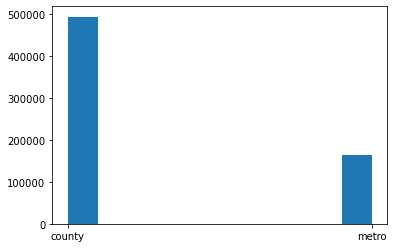

In [68]:
plt.hist(df_1week['region_type'])

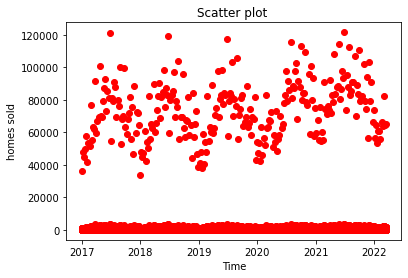

In [70]:
plt.scatter(df_1week['period_begin'],df_1week['total_homes_sold'], color='r')
plt.title('Scatter plot ')
plt.xlabel('Time')
plt.ylabel('homes sold')
plt.show()

In [77]:
corr = df_1week.corr()
corr.style.background_gradient(cmap='coolwarm')

,region_id,region_type_id,inventory,inventory_yoy,total_active_listings,total_active_listings_yoy,active_listings,active_listings_yoy,age_of_inventory,age_of_inventory_yoy,median_active_list_price,median_active_list_price_yoy,median_active_list_ppsf,median_active_list_ppsf_yoy
region_id,1.000000,-0.901318,0.005611,-0.001539,0.005676,-0.001570,0.005676,-0.001570,-0.058762,0.001730,0.000482,0.000206,-0.001667,-0.001701
region_type_id,-0.901318,1.000000,-0.054623,0.002728,-0.054883,0.002573,-0.054883,0.002573,0.059681,-0.002373,0.000502,0.000359,0.001891,0.001930
inventory,0.005611,-0.054623,1.000000,-0.004236,0.999705,-0.004055,0.999705,-0.004055,-0.018794,0.004053,0.001305,-0.000501,-0.000176,-0.000182
inventory_yoy,-0.001539,0.002728,-0.004236,1.000000,-0.004337,0.993211,-0.004337,0.993211,0.016031,-0.054236,-0.001303,-0.000194,-0.000152,-0.000149
total_active_listings,0.005676,-0.054883,0.999705,-0.004337,1.000000,-0.004125,1.000000,-0.004125,-0.019686,0.003877,0.001207,-0.000497,-0.000191,-0.000197
total_active_listings_yoy,-0.001570,0.002573,-0.004055,0.993211,-0.004125,1.000000,-0.004125,1.000000,0.009903,-0.056289,-0.001143,-0.000186,-0.000173,-0.000170
active_listings,0.005676,-0.054883,0.999705,-0.004337,1.000000,-0.004125,1.000000,-0.004125,-0.019686,0.003877,0.001207,-0.000497,-0.000191,-0.000197
active_listings_yoy,-0.001570,0.002573,-0.004055,0.993211,-0.004125,1.000000,-0.004125,1.000000,0.009903,-0.056289,-0.001143,-0.000186,-0.000173,-0.000170
age_of_inventory,-0.058762,0.059681,-0.018794,0.016031,-0.019686,0.009903,-0.019686,0.009903,1.000000,0.503466,-0.007178,0.007110,-0.003881,-0.004066
age_of_inventory_yoy,0.001730,-0.002373,0.004053,-0.054236,0.003877,-0.056289,0.003877,-0.056289,0.503466,1.000000,-0.016035,-0.011116,-0.017324,-0.017411


<function matplotlib.pyplot.show(close=None, block=None)>

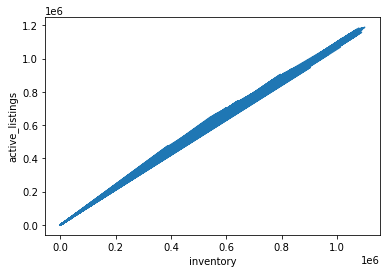

In [79]:
figure = plt.figure()
plt.plot(df_1week['inventory'],df_1week['active_listings'])
#plt.plot(df_sort_year['Year'],df_sort_year['Foreign direct investment, net outflows (% of GDP)'])
#plt.plot(df_sort_year['Year'],df_sort_year['Inflation, consumer prices (annual %)'])
plt.xlabel('inventory')
plt.ylabel('active_listings')
plt.show